In [1]:


import os
import numpy as np 
import matplotlib.pyplot as plt 
import torch

In [5]:
def _dice_coef(output, target, threshold: float, smooth= 1):
  assert(len(output.shape)==3)
  assert(output.shape == target.shape)
  if target.min() == -1:
    dice_output = torch.where(output>threshold , 1, 0)
    dice_target = torch.where(target>0, 1, 0)
  elif target.min() == 0:
    dice_output = torch.where(output>0.5, 1, 0)
    dice_target = target


  intersection =  torch.sum(dice_target*dice_output, dim=(1,2))
  union        =  torch.sum(dice_target, dim=(1,2))+ torch.sum(dice_output, dim=(1,2))
  dice         =  torch.mean((2.*intersection + smooth)/(union + smooth), dim=0)
  return dice.item()

In [2]:
path = 'model_saved_Valid\ValidPredOnly\RatioTrainValid 0.8 RatioPosToNeg 0.95 Epoch 1\PredTar_0.pth'
threshold = np.round(np.arange(0,10,0.1), 1)

In [29]:
step = np.round(np.arange(0,10,0.1), 1)
def find_threshold_for_dice(path_to_pred: str, step_size: dict): 
    threshold = []
    dice_coef = []
    for key in step_size:
        # print(key, arr)
        batch_dice = []   
        for files in os.listdir(path_to_pred):
            path        = os.path.join(path_to_pred, files)
            saved_dict  = torch.load(path)
            output      = saved_dict['output']
            target      = saved_dict['target']
            
            batch_dice.append(_dice_coef(output, target, float(key)))

        arr = np.mean(batch_dice)
        threshold.append(float(key))
        dice_coef.append(arr)
    return (threshold, dice_coef)
    

results = find_threshold_for_dice(path, step)

0.0 0.008492489954385857
0.1 0.00869467244275377
0.2 0.00888828167765858
0.3 0.009075319188105207
0.4 0.00925815186589884
0.5 0.009437574426120624
0.6 0.009615583046720722
0.7 0.009792688174224474
0.8 0.009970202797143736
0.9 0.010149122907141145
1.0 0.010330748380369787
1.1 0.010516485241057145
1.2 0.010706917509552646
1.3 0.01090402308170319
1.4 0.011108033144586601
1.5 0.011321956053312904
1.6 0.011545486729098544
1.7 0.011780789021487742
1.8 0.01203030072571559
1.9 0.012294474333444834
2.0 0.012577222992852933
2.1 0.012873185600450227
2.2 0.013197218260933527
2.3 0.013537064441637978
2.4 0.013907912618184498
2.5 0.01430195816621127
2.6 0.014724259575773151
2.7 0.015167211866967718
2.8 0.015642315233887316
2.9 0.01615441333002209
3.0 0.016700706186796265
3.1 0.01727795817578079
3.2 0.01789597752867613
3.3 0.018566204699300363
3.4 0.019272613151976235
3.5 0.020023055131148552
3.6 0.020822503537875466
3.7 0.02164595467972789
3.8 0.022527924529540513
3.9 0.023445073440392174
4.0 0.0244

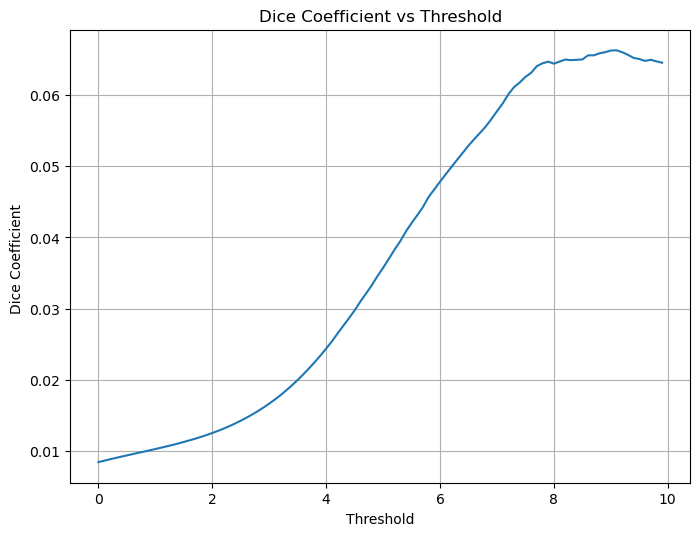

In [30]:
def plt_threshold_dice(results: tuple):
    plt.figure(figsize=(8, 6), dpi=100)
    plt.xlabel('Threshold')
    plt.ylabel('Dice Coefficient ')
    plt.title('Dice Coefficient vs Threshold')
    plt.grid()

    threshold = results[0]
    dice_coef = results[1]
    plt.plot(threshold,dice_coef)


plt_threshold_dice(results)